## Midterm - Numerical Project

In [150]:
import math
import numpy as np 
import matplotlib.pyplot as plt 
plt.style.use('seaborn')
%matplotlib inline

In [151]:
np.random.seed(0)

In [152]:
time_index = np.arange(0.01, 1.01, 0.01)

In [153]:
# standard brownian motion covariance matrix 
bm_cov = np.reshape(np.array([i if i < j else j for j in time_index for i in time_index]), (100,100))

In [154]:
# the standard brownian motion to be implemented 
brownian_motion = np.insert(np.array([np.linalg.cholesky(bm_cov).dot(np.random.normal(loc=0, scale=1, size=100)) for _ in range(10)]), 
                            obj=0, 
                            values=0,
                            axis=1)

We consider the following processes 
##### $$X_t = e^{\ t \ / \ 2}cos \ B_t$$
##### $$Y_t = 1 - \int_{0}^{t} e^{\ s \ / \ 2}sin \ B_s \ dB_s$$

1. Plot 10 paths of the process $X_t$ on $[0, 1]$ with discretization of $1/100$
2. Plot 10 paths of the process $Y_t$ on $[0, 1]$ with discretization of $1/100$ (same brownian path)

In [155]:
e_base = np.array([math.exp(i/2) for i in np.insert(time_index,0,0)])

In [156]:
X_t = e_base * np.cos(brownian_motion)

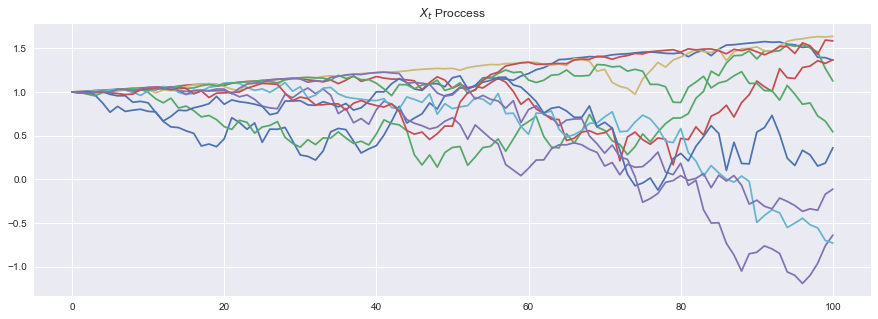

In [157]:
plt.figure(figsize=(15,5))
plt.title("$X_t$ Proccess")
for  i in X_t:
    plt.plot(i)

In [171]:
yt_wrapper = [0]*10

In [172]:
for i in range(10):
    yt_wrapper[i] = 1 - np.array([math.exp(i/2) for i in np.insert(time_index,0,0)])[:-1] * np.sin(brownian_motion[i])[:-1] * (brownian_motion[i][1:] - brownian_motion[i][:-1])

In [173]:
Y_t = np.array(yt_wrapper)

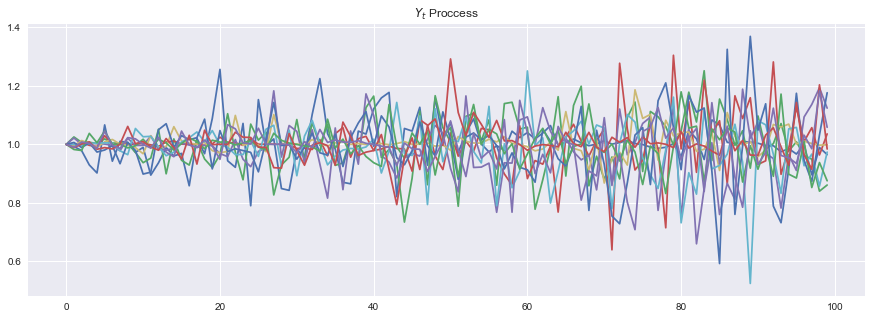

In [174]:
plt.figure(figsize=(15,5))
plt.title("$Y_t$ Proccess")
for  i in Y_t:
    plt.plot(i)

c) Plot the paths of the two processes on the same graph.

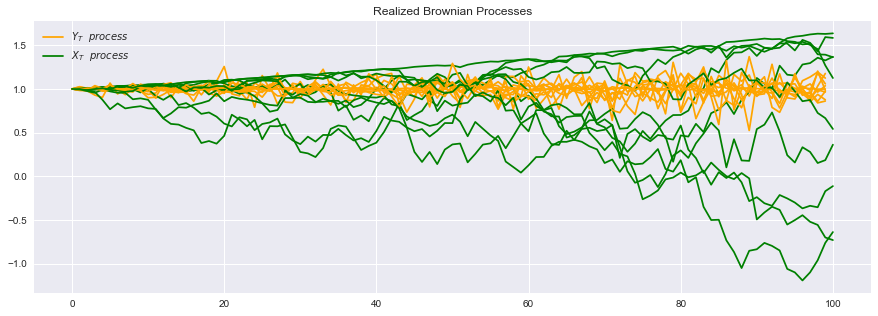

In [193]:
plt.figure(figsize=(15,5))
plt.title("Realized Brownian Processes")
for i in range(10):
    plt.plot(Y_t[i], color='orange', label="Y_T")
    plt.plot(X_t[i], color='green', label="X_T")
plt.legend(['$Y_T \ \ process$', '$X_T \ \ process$'])

d) Estimate the error between the two processes given by $E[|X_1-Y_1|]$ by doing the empirical average of $|X_1 - Y_1|$ on 10 paths, 100 paths and 1000 paths.